
Please wait a moment...
Click on the new window when it appears.

--------------------------------------------------------------------------------------

Congratulations! You managed 7 curls!

The red/blue lines show the angle of your targetted body part throughout your exercise,
whereas the green dotted line is the minimum angle required for the exercis


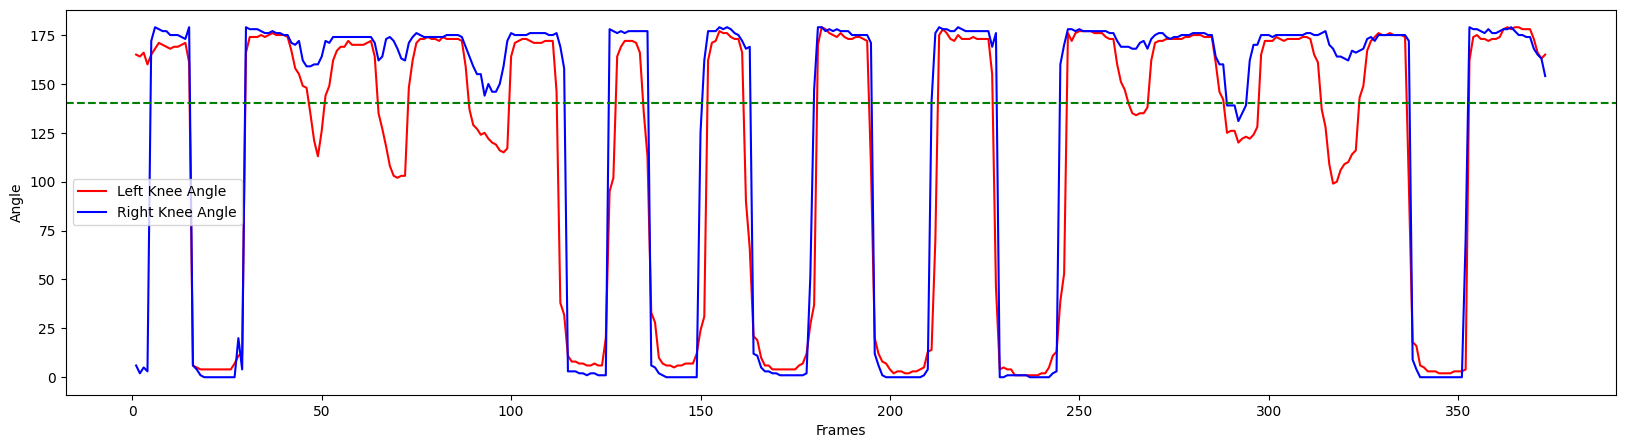

In [19]:
import mediapipe as mp
import cv2
import numpy as np
import matplotlib.pyplot as plt

# draw landmarks & connections to screen
mp_drawing = mp.solutions.drawing_utils
# import Pose model
mp_pose = mp.solutions.pose

def calc_angle(x, y, z):
    x = np.array(x)
    y = np.array(y)
    z = np.array(z)

    radians = np.arctan2(z[1]-y[1], z[0]-y[0]) - np.arctan2(x[1]-y[1], x[0]-y[0])
    angle = np.abs(radians * 180.0 / np.pi)

    if angle > 180.0:
        angle = 360 - angle

    return angle

def recognise_curl(detection):
    
    global counter
    global state
    global feedback
    global range_flag
    global left_angle
    global right_angle
    
    try:
        landmarks = detection.pose_landmarks.landmark
        
        # left arm
        left_wrist = [landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].x, landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].y]
        left_shoulder = [landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].x, landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].y]
        left_elbow = [landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].x, landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].y] 

        # right arm
        right_wrist = [landmarks[mp_pose.PoseLandmark.RIGHT_WRIST.value].x, landmarks[mp_pose.PoseLandmark.RIGHT_WRIST.value].y]
        right_shoulder = [landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].x, landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].y]
        right_elbow = [landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value].x, landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value].y]
        
        left_elbow_angle = calc_angle(left_shoulder, left_elbow, left_wrist)
        right_elbow_angle = calc_angle(right_shoulder, right_elbow, right_wrist)
        left_angle.append(int(left_elbow_angle))
        right_angle.append(int(right_elbow_angle))
        
        # down state
        if left_elbow_angle > 160 and right_elbow_angle > 160:
            if not range_flag:
                feedback = 'Did not perform completely.'
            else:
                feedback = 'Good rep!'
            state = 'Down'
         # not fully curled
        elif (left_elbow_angle > 50 and right_elbow_angle > 50) and state == 'Down':
            range_flag = False
            feedback = ''
            
        # up state
        elif (left_elbow_angle < 30 and right_elbow_angle < 30) and state == 'Down':
            state = 'Up'
            feedback = ''
            range_flag = True
            counter += 1
    
    except:
        left_angle.append(180)
        right_angle.append(180)

def recognise_leftCurl(detection):
    
    global counter
    global state
    global feedback
    global range_flag
    global left_angle
    global right_angle
    
    try:
        landmarks = detection.pose_landmarks.landmark

        # right arm
        right_wrist = [landmarks[mp_pose.PoseLandmark.RIGHT_WRIST.value].x, landmarks[mp_pose.PoseLandmark.RIGHT_WRIST.value].y]
        right_shoulder = [landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].x, landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].y]
        right_elbow = [landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value].x, landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value].y]
        
        right_elbow_angle = calc_angle(right_shoulder, right_elbow, right_wrist)
        right_angle.append(int(right_elbow_angle))
        
        # down state
        if  right_elbow_angle > 160:
            if not range_flag:
                feedback = 'Did not perform completely.'
            else:
                feedback = 'Good rep!'
            state = 'Down'
         # not fully curled
        elif ( right_elbow_angle > 50) and state == 'Down':
            range_flag = False
            feedback = ''
            
        # up state
        elif ( right_elbow_angle < 30) and state == 'Down':
            state = 'Up'
            feedback = ''
            range_flag = True
            counter += 1
    
    except:
        right_angle.append(180)

def recognise_rightCurl(detection):
    
    global counter
    global state
    global feedback
    global range_flag
    global left_angle
    global right_angle
    
    try:
        landmarks = detection.pose_landmarks.landmark
        
        # left arm
        left_wrist = [landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].x, landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].y]
        left_shoulder = [landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].x, landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].y]
        left_elbow = [landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].x, landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].y] 
        
        left_elbow_angle = calc_angle(left_shoulder, left_elbow, left_wrist)
        left_angle.append(int(left_elbow_angle))
        
        # down state
        if left_elbow_angle > 160:
            if not range_flag:
                feedback = 'Did not perform completely.'
            else:
                feedback = 'Good rep!'
            state = 'Down'
         # not fully curled
        elif (left_elbow_angle > 50) and state == 'Down':
            range_flag = False
            feedback = ''
            
        # up state
        elif (left_elbow_angle < 30) and state == 'Down':
            state = 'Up'
            feedback = ''
            range_flag = True
            counter += 1
    
    except:
        left_angle.append(180)
        
def recognise_pushups(detection):
    
    global counter
    global state
    global feedback
    global range_flag
    global left_angle
    global right_angle
    
    try:
        landmarks = detection.pose_landmarks.landmark
        
        # left arm
        left_wrist = [landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].x, landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].y]
        left_shoulder = [landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].x, landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].y]
        left_elbow = [landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].x, landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].y] 

        # right arm
        right_wrist = [landmarks[mp_pose.PoseLandmark.RIGHT_WRIST.value].x, landmarks[mp_pose.PoseLandmark.RIGHT_WRIST.value].y]
        right_shoulder = [landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].x, landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].y]
        right_elbow = [landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value].x, landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value].y]
        
        left_elbow_angle = calc_angle(left_shoulder, left_elbow, left_wrist)
        right_elbow_angle = calc_angle(right_shoulder, right_elbow, right_wrist)
        left_angle.append(int(left_elbow_angle))
        right_angle.append(int(right_elbow_angle))
        
        # down state
        if left_elbow_angle > 160 and right_elbow_angle > 160:
            if not range_flag:
                feedback = 'Did not perform completely.'
            else:
                feedback = 'Good pushup!'
            state = 'Down'
         # not fully curled
        elif (left_elbow_angle > 50 and right_elbow_angle > 50) and state == 'Down':
            range_flag = False
            feedback = ''
            
        # up state
        elif (left_elbow_angle < 30 and right_elbow_angle < 30) and state == 'Down':
            state = 'Up'
            feedback = ''
            range_flag = True
            counter += 1
    
    except:
        left_angle.append(180)
        right_angle.append(180)
        
def recognise_squat(detection):
    
    global counter
    global state
    global feedback
    global left_angle
    global right_angle
       
    try:
        landmarks = detection.pose_landmarks.landmark
        
        # GET COORDINATES
        left_hip = [landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].x, landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].y]
        left_knee = [landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value].x, landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value].y]
        left_heel = [landmarks[mp_pose.PoseLandmark.LEFT_HEEL.value].x, landmarks[mp_pose.PoseLandmark.LEFT_HEEL.value].y]
        
        right_hip = [landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value].x, landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value].y]
        right_knee = [landmarks[mp_pose.PoseLandmark.RIGHT_KNEE.value].x, landmarks[mp_pose.PoseLandmark.RIGHT_KNEE.value].y]
        right_heel = [landmarks[mp_pose.PoseLandmark.RIGHT_HEEL.value].x, landmarks[mp_pose.PoseLandmark.RIGHT_HEEL.value].y]
        
        left_shoulder = [landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].x, landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].y]
        right_shoulder = [landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].x, landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].y]

        left = calc_angle(left_hip, left_knee, left_heel)
        right = calc_angle(right_hip, right_knee, right_heel)        
        left_angle.append(int(left))
        right_angle.append(int(right))

         #POSE CHECKING 1: Knees bending inwards    
        shoulder_dist = left_shoulder[0] - right_shoulder[0]
        knee_dist = left_knee[0] - right_knee[0]

        if shoulder_dist - knee_dist > 0.04:
            feedback = 'Did not perform completely.'
        else:
            feedback = ''

        # standing up
        if left > 170 and right > 170:
            state = "Up"
            
        if left < 165 and right < 165:
            feedback = 'Did not perform completely.'
            
        if left < 140 and right < 140 and state == "Up":
            state = "Down"
            counter += 1
            
        if state == "Down":
            feedback = 'Good rep!'
    
    except:
        left_angle.append(180)
        right_angle.append(180)

def recognise_situp(detection):
    
    global counter
    global state
    global feedback
    global range_flag
    global halfway
    global body_angles
    
    try: 
        landmarks = detection.pose_landmarks.landmark
        
        left_hip = [landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].x, landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].y]
        left_knee = [landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value].x, landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value].y]
        left_heel = [landmarks[mp_pose.PoseLandmark.LEFT_HEEL.value].x, landmarks[mp_pose.PoseLandmark.LEFT_HEEL.value].y]
        left_shoulder = [landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].x, landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].y]

        # CALCULATE ANGLES 
        angle_knee = calc_angle(left_hip, left_knee, left_heel)
        angle_body = calc_angle(left_shoulder, left_hip, left_knee)
        body_angles.append(int(angle_body))
      
        if (angle_body < 80 and angle_body > 50) and state == "Down": #Half-way there (Used for checking bad situps)
            halfway = True
        if angle_body < 40 and state == "Down": #Complete situp
            state = "Up"
            range_flag = True
            
        if angle_body > 90 and angle_knee < 60: #Resting position;to check if situp was done properly
            state = "Down"
            
            if halfway: #Check if a rep was attempted
                if range_flag: #Check if a proper rep was performed
                    counter += 1
                    feedback = "Good repetition!"
                else:
                    feedback = "Did not perform completely."
                range_flag = False #Reset vars
                halfway = False
                
        if angle_knee > 70: #Triggers anytime the legs are not tucked in
            feedback = "Keep legs tucked in closer"

    except: 
        body_angles.append(180)

def plot_viz(user_choice):
    
    # Set figure size
    plt.rcParams["figure.figsize"] = (20,5)
    
    # Squat viz
    if user_choice == 1:
        fig, ax = plt.subplots()
        ax.plot(frames, left_angle, '-', color = 'red', label = 'Left Knee Angle')
        ax.plot(frames, right_angle, '-', color = 'blue', label = 'Right Knee Angle')
        ax.axhline(y=140, color='g', linestyle='--')
        ax.legend(loc = 'center left')
        ax.set_xlabel('Frames')
        ax.set_ylabel('Angle')
        print(f'Congratulations! You managed {counter} curls!')
        
    # Curl viz
    elif user_choice == 2:
        fig, ax = plt.subplots()
        ax.plot(frames, left_angle, '-', color = 'red', label = 'Left Arm Angle')
        ax.plot(frames, right_angle, '-', color = 'blue', label = 'Right Arm Angle')
        ax.axhline(y=30, color='g', linestyle='--')
        ax.legend(loc = 'center left')
        ax.set_xlabel('Frames')
        ax.set_ylabel('Angle')
        print(f'Congratulations! You managed {counter} Right curls!')

    # Right Curl viz
    elif user_choice == 3:
        fig, ax = plt.subplots()
        ax.plot(frames, left_angle, '-', color = 'blue', label = 'Right Arm Angle')
        ax.axhline(y=30, color='g', linestyle='--')
        ax.legend(loc = 'center left')
        ax.set_xlabel('Frames')
        ax.set_ylabel('Angle')
        print(f'Congratulations! You managed {counter} Left Curls!')
    
        # Left Curl viz
    elif user_choice == 4:
        fig, ax = plt.subplots()
        ax.plot(frames, right_angle, '-', color = 'blue', label = 'Left Arm Angle')
        ax.axhline(y=30, color='g', linestyle='--')
        ax.legend(loc = 'center left')
        ax.set_xlabel('Frames')
        ax.set_ylabel('Angle')
        print(f'Congratulations! You managed {counter} Pushups Curls!')
    
    
    #Pushups viz
    elif user_choice == 5:
        fig, ax = plt.subplots()
        ax.plot(frames, left_angle, '-', color = 'red', label = 'Left Arm Angle')
        ax.plot(frames, right_angle, '-', color = 'blue', label = 'Right Arm Angle')
        ax.axhline(y=30, color='g', linestyle='--')
        ax.legend(loc = 'center left')
        ax.set_xlabel('Frames')
        ax.set_ylabel('Angle')
        print(f'Congratulations! You managed {counter} squat!')
        
    # Situp viz
    else:
        plt.plot(frames, body_angles, '-', color = 'red', label = 'Body Angle')
        plt.axhline(y=40, color='g', linestyle='--')
        plt.xlabel('Frames')
        plt.ylabel('Angle')
        print(f'Congratulations! You managed {counter} situps!')

# initialise variables
counter = 0
state = 'Down'
range_flag = True
halfway = False
feedback = ''
frame_count = 0
# Plotting variables
frames = []
left_angle = []
right_angle = []
body_angles = []

# Prompt user input for exercise selection
while True:
    try:
        user_choice = int(input('Which exercise would you like to do? Please enter 1, 2 or 3.\n1. Squat \n2. Arm Curl\n3. Right Arm Curl \n4. Left Arm Curl \n5. Pushups \n6. Sit-up\n'))
        print("")
        if user_choice in [1, 2, 3, 4, 5, 6]:
            print('Please wait a moment...')
            print('Click on the new window when it appears.\n')
            print('--------------------------------------------------------------------------------------\n')
            break
        else:
            print("Please enter either integer 1, 2, 3, 4, 5 or 6")
            print("")
    except:
        print("Please enter either integer 1, 2, 3, 4, 5  or 6")
        print("")

# Open webcam
feed = cv2.VideoCapture(0)

# Get user's maximum resolution
WIDTH = 10000
HEIGHT = 10000
feed.set(cv2.CAP_PROP_FRAME_WIDTH, WIDTH)
feed.set(cv2.CAP_PROP_FRAME_HEIGHT, HEIGHT)
width = int(feed.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(feed.get(cv2.CAP_PROP_FRAME_HEIGHT))

# Mediapipe Pose model instance
with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
    while feed.isOpened():
        ret, frame = feed.read()
        frame_count += 1
        frames.append(frame_count)
        # Mirror frame
        frame = cv2.flip(frame, 1)
        # Recolor image from BGR to RGB
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False
        
        # Pose detection
        detection = pose.process(image)
        # Recolor image from RGB back to BGR
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image.flags.writeable = True

        # Render detections
        mp_drawing.draw_landmarks(image, detection.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                                mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=2), 
                                mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2))
        
        # Recognise particular exercise based on user input
        if user_choice == 1:
            recognise_curl(detection)
        elif user_choice == 2:
            recognise_rightCurl(detection)
        elif user_choice == 3:
            recognise_leftCurl(detection)
        elif user_choice == 4:
            recognise_pushups(detection)
        elif user_choice == 5:
             recognise_squat(detection)
        else:
            recognise_situp(detection)
        

        # Status box setup
        cv2.rectangle(image, (0,0), (width, int(height*0.1)), (245,117,16), -1)
        cv2.putText(image, "REPS:", (int(width*0.01), int(height*0.025)), 
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,0), 1, cv2.LINE_AA) # font, size, color, line width, line type
        
        cv2.putText(image, "STATE:", (int(width*0.1), int(height*0.025)), 
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,0), 1, cv2.LINE_AA)
        
        cv2.putText(image, "FEEDBACK:", (int(width*0.2), int(height*0.025)), 
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,0), 1, cv2.LINE_AA)
        
        cv2.putText(image, str(counter), (int(width*0.01), int(height*0.08)), 
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
        cv2.putText(image, state, (int(width*0.1), int(height*0.08)), 
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        if feedback == 'Did not perform completely.'|feedback == 'Open up your knees further apart to shoulder width!'|feedback == 'Almost there... lower until height of hips!'|feedback=="Keep legs tucked in closer":
            cv2.putText(image, feedback, (int(width*0.2), int(height*0.08)), 
                        cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,255), 2, cv2.LINE_AA)
        else:
            cv2.putText(image, feedback, (int(width*0.2), int(height*0.08)), 
                        cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)        
        window_name = 'Exercise Counter'
        
        cv2.namedWindow(window_name, cv2.WINDOW_NORMAL)
        cv2.imshow(window_name, image)
        
        # quit webcam
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
cv2.destroyAllWindows()
cv2.waitKey(1)
feed.release()

plot_viz(user_choice)
print('\nThe red/blue lines show the angle of your targetted body part throughout your exercise,') 
print('whereas the green dotted line is the minimum angle required for the exercis')